<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/datos_raw.csv", delimiter=',', encoding='latin1')

In [4]:
#importamos las funciones creadas para analizar los datos
import sys
sys.path.append('/content/drive/MyDrive/Churn Rate Algorithm')
import funciones

In [5]:
df.head()

,MEDCOD,Edad,AnosCliente,ConGestorSubAgente,ConGestorAsignado,sCodProvincia,sCodPostal,sNomEstadoCivil,Dominio,SEXO,...,NumeRecibos_Menos3,PrimasPagadas_Menos3,Num_Siniestros_Menos3,Num_Pol_Vigor_Hogar_Menos3,Num_Pol_Vigor_Autos_Menos3,Num_Pol_Vigor_Decesos_Menos3,Num_Pol_Vigor_Salud_Menos3,Num_Pol_Vigor_PensionesVida_Menos3,Num_Pol_Vigor_Resto_Menos3,EsBaja
0,GES000000002,68,27,0,0,24,24,4,0,3,...,1,327.93,0,0,1,0,0,0,0,0
1,GES000000004,77,30,0,0,24,24,1,1,1,...,9,1576.00,0,0,1,0,0,0,1,0
2,GES000000005,67,27,0,0,24,24,4,1,3,...,1,607.10,0,0,0,0,0,0,1,0
3,GES000000010,64,27,0,0,24,24,1,1,2,...,1,235.05,0,0,0,0,0,0,1,0
4,GES000000017,66,26,0,0,24,24,1,1,3,...,2,412.94,0,0,1,0,0,0,0,0


In [6]:
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'ConGestorSubAgente',
       'ConGestorAsignado', 'sCodProvincia', 'sCodPostal', 'sNomEstadoCivil',
       'Dominio', 'SEXO', 'TipoPersona', 'Num_Pol_Vigor_Menos0',
       'NumeRecibos_Menos0', 'PrimasPagadas_Menos0', 'Num_Siniestros_Menos0',
       'Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0',
       'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0',
       'Num_Pol_Vigor_PensionesVida_Menos0', 'Num_Pol_Vigor_Resto_Menos0',
       'Num_Pol_Vigor_Menos1', 'NumeRecibos_Menos1', 'PrimasPagadas_Menos1',
       'Num_Siniestros_Menos1', 'Num_Pol_Vigor_Hogar_Menos1',
       'Num_Pol_Vigor_Autos_Menos1', 'Num_Pol_Vigor_Decesos_Menos1',
       'Num_Pol_Vigor_Salud_Menos1', 'Num_Pol_Vigor_PensionesVida_Menos1',
       'Num_Pol_Vigor_Resto_Menos1', 'Num_Pol_Vigor_Menos2',
       'NumeRecibos_Menos2', 'PrimasPagadas_Menos2', 'Num_Siniestros_Menos2',
       'Num_Pol_Vigor_Hogar_Menos2', 'Num_Pol_Vigor_Autos_Menos2',
       'Num_Pol_V

In [7]:
columnas_repetidas = df.columns[df.columns.duplicated()]
if len(columnas_repetidas) > 0:
    print("Hay columnas repetidas:", columnas_repetidas)
else:
    print("No hay columnas repetidas.")

No hay columnas repetidas.


In [8]:
num_filas, num_columnas = df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 11396
Número de columnas: 52


#Analisis de la columna 'EsBaja'
Columna target.

In [9]:
funciones.analizar_columna(df, 'EsBaja')

[0, 1]

Valor '0': 10258 registros

Valor '1': 1138 registros

0    90.01404
1     9.98596
Name: EsBaja, dtype: float64


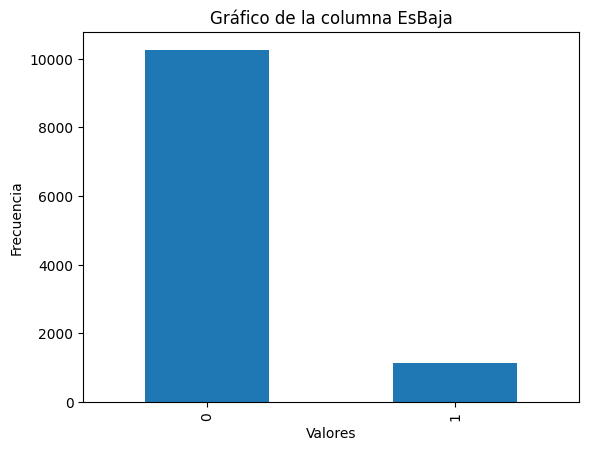

In [10]:
df['EsBaja'].value_counts().plot(kind='bar')
plt.title('Gráfico de la columna EsBaja')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# datos faltantes en cada columna
datos_faltantes_por_columna = df.isna().sum()

# datos faltantes en todo el DataFrame
total_datos_faltantes = datos_faltantes_por_columna.sum()

print("Número de datos faltantes por columna:")
print(datos_faltantes_por_columna)
print("\nTotal de datos faltantes en el DataFrame:", total_datos_faltantes)


Número de datos faltantes por columna:
MEDCOD                                0
Edad                                  0
AnosCliente                           0
ConGestorSubAgente                    0
ConGestorAsignado                     0
sCodProvincia                         0
sCodPostal                            0
sNomEstadoCivil                       0
Dominio                               0
SEXO                                  0
TipoPersona                           0
Num_Pol_Vigor_Menos0                  0
NumeRecibos_Menos0                    0
PrimasPagadas_Menos0                  0
Num_Siniestros_Menos0                 0
Num_Pol_Vigor_Hogar_Menos0            0
Num_Pol_Vigor_Autos_Menos0            0
Num_Pol_Vigor_Decesos_Menos0          0
Num_Pol_Vigor_Salud_Menos0            0
Num_Pol_Vigor_PensionesVida_Menos0    0
Num_Pol_Vigor_Resto_Menos0            0
Num_Pol_Vigor_Menos1                  0
NumeRecibos_Menos1                    0
PrimasPagadas_Menos1                  0
N

In [12]:
print(df.dtypes)

MEDCOD                                 object
Edad                                    int64
AnosCliente                             int64
ConGestorSubAgente                      int64
ConGestorAsignado                       int64
sCodProvincia                           int64
sCodPostal                              int64
sNomEstadoCivil                         int64
Dominio                                 int64
SEXO                                    int64
TipoPersona                             int64
Num_Pol_Vigor_Menos0                    int64
NumeRecibos_Menos0                      int64
PrimasPagadas_Menos0                  float64
Num_Siniestros_Menos0                   int64
Num_Pol_Vigor_Hogar_Menos0              int64
Num_Pol_Vigor_Autos_Menos0              int64
Num_Pol_Vigor_Decesos_Menos0            int64
Num_Pol_Vigor_Salud_Menos0              int64
Num_Pol_Vigor_PensionesVida_Menos0      int64
Num_Pol_Vigor_Resto_Menos0              int64
Num_Pol_Vigor_Menos1              

<ipython-input-13-aa289f43821a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


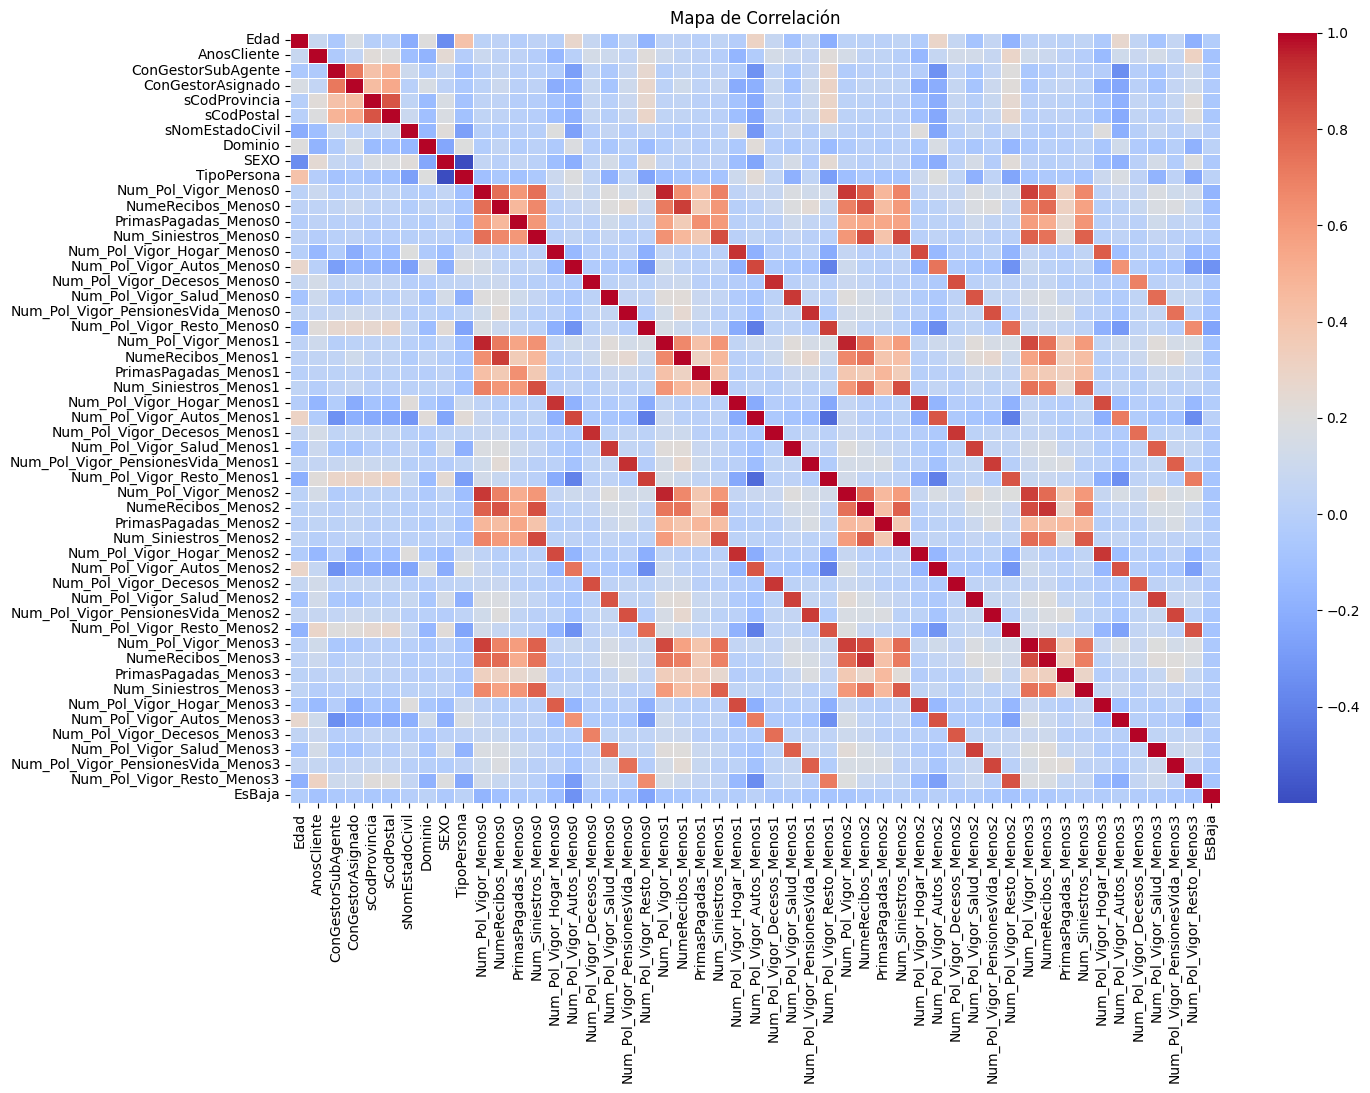

In [13]:
# matriz de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()

#Analisis columna a columna

#Columna 'MEDCOD'

In [14]:
df['MEDCOD']

0        GES000000002
1        GES000000004
2        GES000000005
3        GES000000010
4        GES000000017
             ...     
11391    IDR000009193
11392    IDR000009226
11393    IDR000009273
11394    IDR000009399
11395    IDR000009471
Name: MEDCOD, Length: 11396, dtype: object

In [15]:
# Obtener los primeros 4 caracteres de la columna 'MEDCOD' para identificar los grupos.
df['grupo'] = df['MEDCOD'].str[:4]

cantidad_por_grupo = df['grupo'].value_counts()

print("Cantidad de registros por grupo:")
print(cantidad_por_grupo)

Cantidad de registros por grupo:
IDR0    3348
TUR0    3102
ALC0    3039
GES0    1907
Name: grupo, dtype: int64


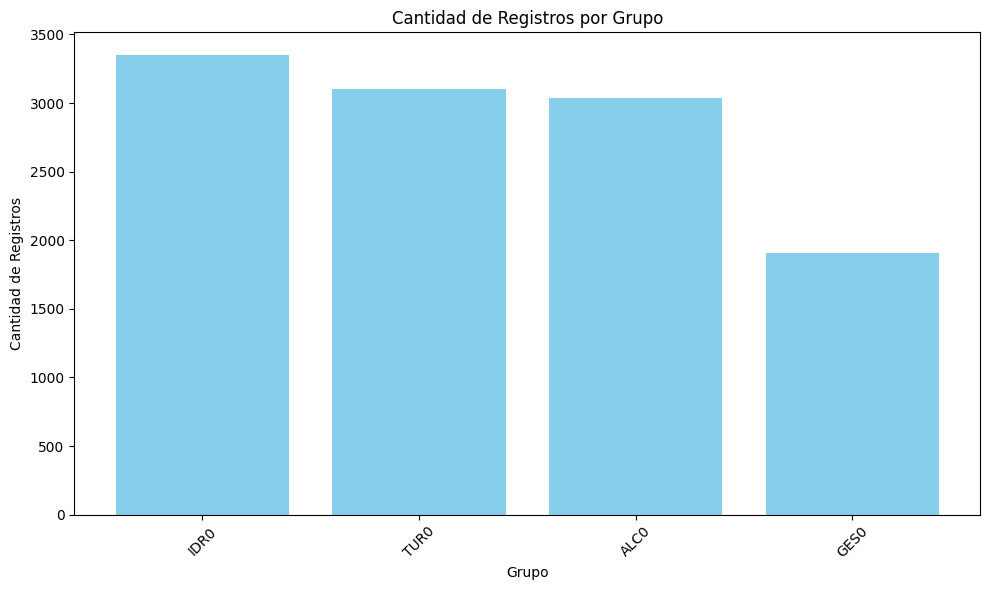

In [16]:
grupos = cantidad_por_grupo.index
cantidad = cantidad_por_grupo.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grupos, cantidad, color='skyblue')

plt.xlabel('Grupo')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Grupo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

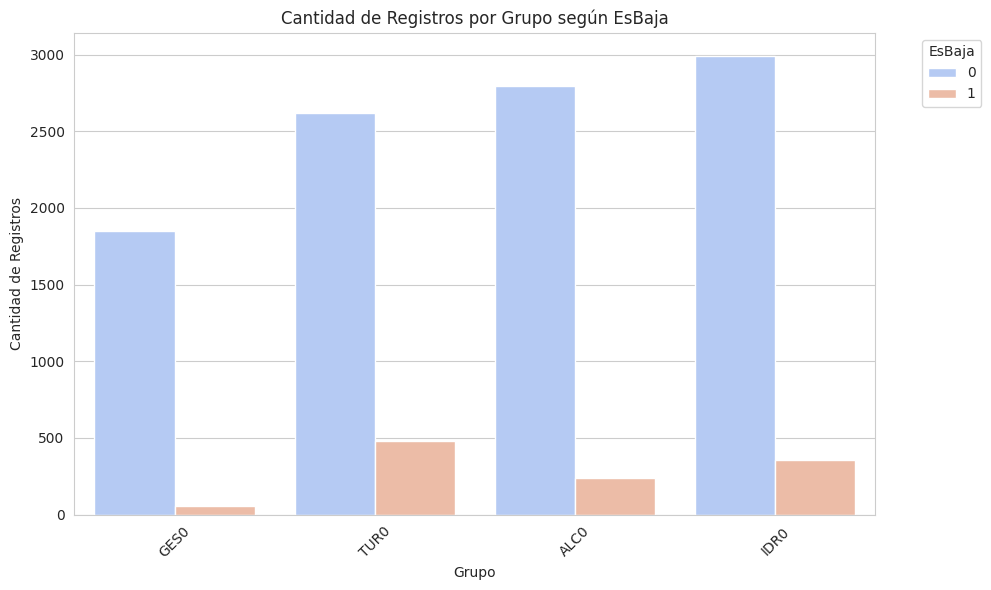

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grupo', hue='EsBaja', palette='coolwarm')

plt.xlabel('Grupo')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Grupo según EsBaja')

plt.legend(title='EsBaja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Agrupa el DataFrame por la columna 'grupo'
grupo_df = df.groupby('grupo')['EsBaja'].value_counts().unstack(fill_value=0)

grupo_df['Total'] = grupo_df.sum(axis=1)

grupo_df['Porcentaje Baja'] = (grupo_df[True] / grupo_df['Total']) * 100
grupo_df['Porcentaje No Baja'] = (grupo_df[False] / grupo_df['Total']) * 100

grupo_df.drop(columns=[True, False], inplace=True)

print(grupo_df)

EsBaja  Total  Porcentaje Baja  Porcentaje No Baja
grupo                                             
ALC0     3039         7.963146           92.036854
GES0     1907         3.093865           96.906135
IDR0     3348        10.633214           89.366786
TUR0     3102        15.506125           84.493875


In [19]:
#df = df.drop(columns=['grupo'])

#Columna 'Edad'

In [20]:
df['Edad'] = df['Edad'].astype(int)

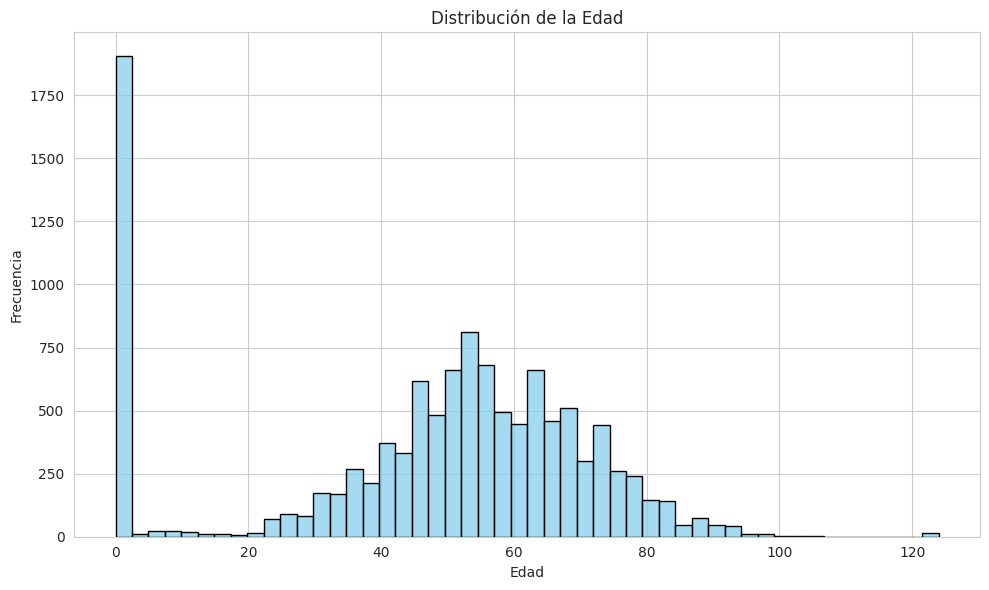

In [21]:
sns.set_style("whitegrid")

# histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.tight_layout()
plt.show()

In [22]:
funciones.analizar_columna(df, 'Edad')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 123, 124]

Valor '0': 1902 registros

Valor '1': 1 registros

Valor '2': 1 registros

Valor '3': 5 registros

Valor '4': 5 registros

Valor '5': 10 registros

Valor '6': 8 registros

Valor '7': 6 registros

Valor '8': 13 registros

Valor '9': 10 registros

Valor '10': 6 registros

Valor '11': 6 registros

Valor '12': 6 registros

Valor '13': 2 registros

Valor '14': 9 registros

Valor '15': 7 registros

Valor '16': 2 registros

Valor '17': 1 registros

Valor '18': 7 registros

Valor '19': 1 registros

Valor '20': 1 registros

Valor '21': 5 registros

Valor '22': 10 registros

Valor 

In [23]:
# Convertir valores mayores que 90 o menores que 16 en 0
df.loc[(df['Edad'] > 90) | (df['Edad'] < 16), 'Edad'] = 0

ceros = (df['Edad'] == 0).sum()
print("Cantidad de valores cero en la columna 'Edad':", ceros)

Cantidad de valores cero en la columna 'Edad': 2112


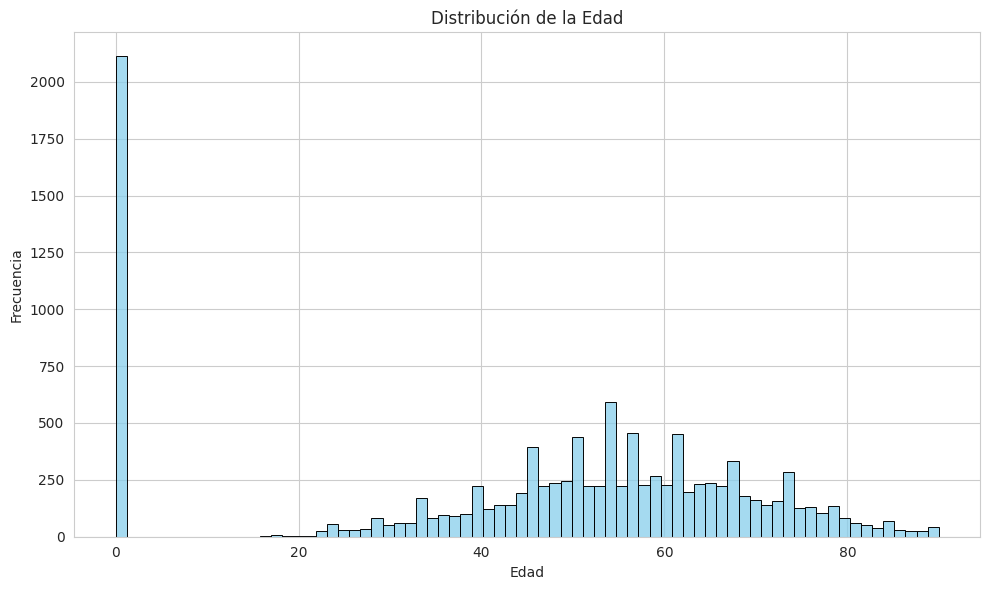

In [24]:
sns.set_style("whitegrid")

# histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=74, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.tight_layout()
plt.show()

In [25]:
print(df['Edad'].describe())

# Contar la frecuencia de cada valor en la columna 'Edad'
frecuencia_edades = df['Edad'].value_counts()
# frecuencia más alta
valores_mas_comunes = frecuencia_edades[frecuencia_edades == frecuencia_edades.max()]
print("Valores que más se repiten en la columna 'Edad':")
print(valores_mas_comunes)


count    11396.000000
mean        45.812566
std         25.129229
min          0.000000
25%         36.000000
50%         53.000000
75%         64.000000
max         90.000000
Name: Edad, dtype: float64
Valores que más se repiten en la columna 'Edad':
0    2112
Name: Edad, dtype: int64


In [26]:
# Iteramos sobre las filas de en la columna Edad, cuando el valor sea 0 lo cambiamos a un número en rango 16 a 90.
rango_edad = list(range(16, 91))

indice_edad = 0

for index, row in df.iterrows():

    if row['Edad'] == 0:
        df.at[index, 'Edad'] = rango_edad[indice_edad]
        indice_edad = (indice_edad + 1) % len(rango_edad)


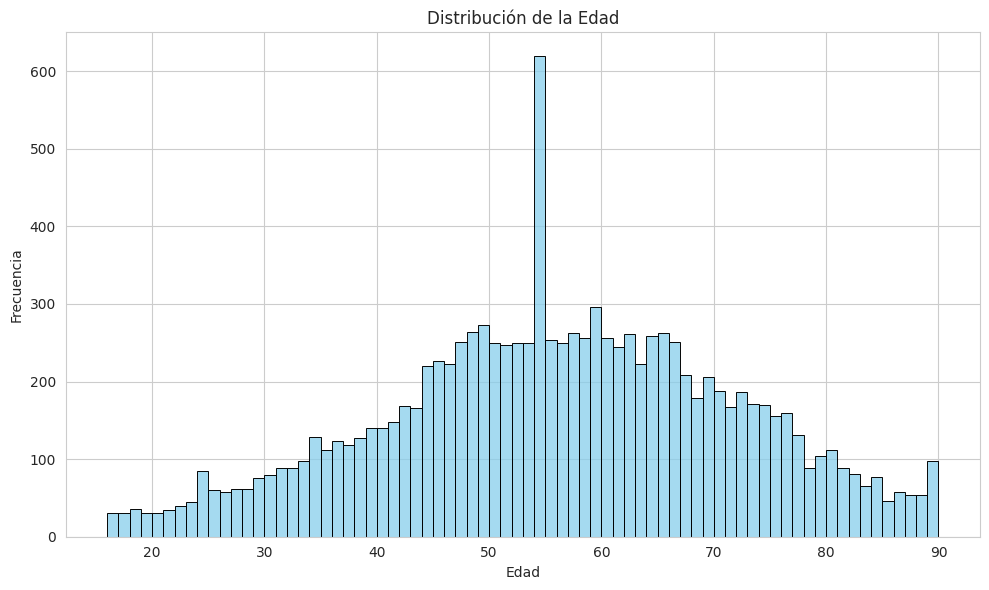

In [27]:
sns.set_style("whitegrid")

# Crear el histograma con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=74, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')

# Mostrar el histograma
plt.tight_layout()
plt.show()

In [28]:
funciones.analizar_columna(df, 'Edad')

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

Valor '16': 31 registros

Valor '17': 30 registros

Valor '18': 36 registros

Valor '19': 30 registros

Valor '20': 30 registros

Valor '21': 34 registros

Valor '22': 39 registros

Valor '23': 45 registros

Valor '24': 85 registros

Valor '25': 60 registros

Valor '26': 57 registros

Valor '27': 61 registros

Valor '28': 61 registros

Valor '29': 76 registros

Valor '30': 80 registros

Valor '31': 89 registros

Valor '32': 89 registros

Valor '33': 98 registros

Valor '34': 129 registros

Valor '35': 112 registros

Valor '36': 123 registros

Valor '37': 118 registros

Valor '38': 127 registros

Valor '39': 140 registros

Valor '40': 140 registros

Valor '41': 148 registros

Valor '42': 16

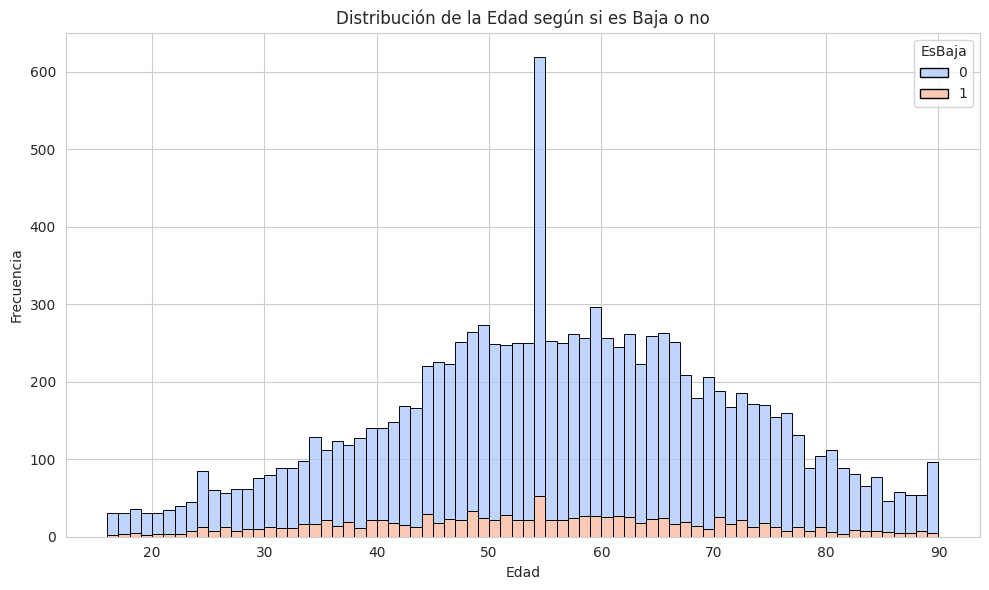

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Edad', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad según si es Baja o no')

plt.tight_layout()
plt.show()

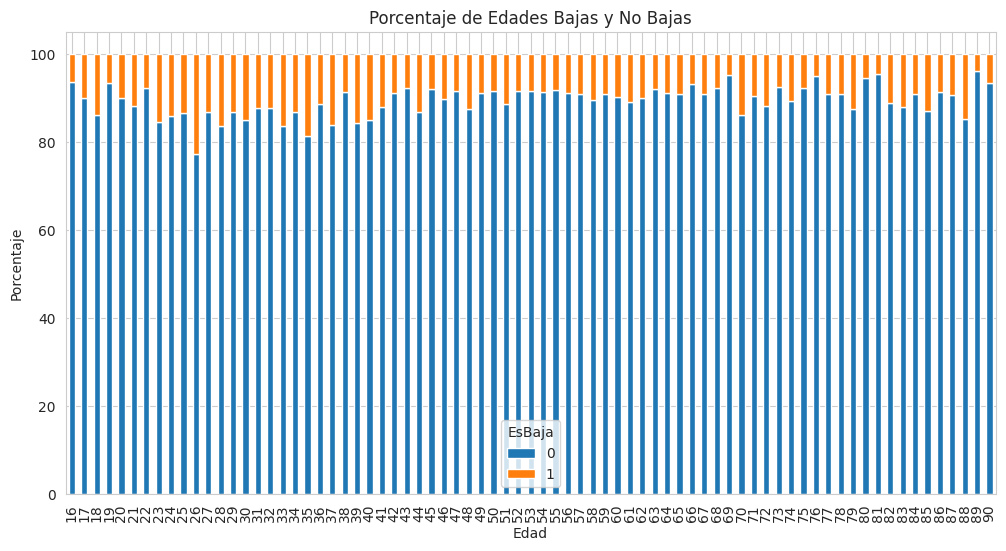

In [30]:
# Calcular el conteo de cada valor en la columna 'Edad' para cada categoría de 'EsBaja'
conteo_por_edad = df.groupby(['Edad', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'Edad' para cada categoría de 'EsBaja'
porcentaje_por_edad = conteo_por_edad.div(conteo_por_edad.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje_por_edad.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Edades Bajas y No Bajas')
ax.set_xlabel('Edad')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columna 'AnosCliente'

In [31]:
df['AnosCliente'] = df['AnosCliente'].astype(int)

In [32]:
funciones.analizar_columna(df, 'AnosCliente')

[-76, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Valor '-76': 1 registros

Valor '0': 10 registros

Valor '1': 96 registros

Valor '2': 92 registros

Valor '3': 1677 registros

Valor '4': 1211 registros

Valor '5': 1734 registros

Valor '6': 2899 registros

Valor '7': 592 registros

Valor '8': 911 registros

Valor '9': 203 registros

Valor '10': 248 registros

Valor '11': 162 registros

Valor '12': 138 registros

Valor '13': 135 registros

Valor '14': 152 registros

Valor '15': 119 registros

Valor '16': 83 registros

Valor '17': 45 registros

Valor '18': 60 registros

Valor '19': 48 registros

Valor '20': 61 registros

Valor '21': 41 registros

Valor '22': 52 registros

Valor '23': 59 registros

Valor '24': 58 registros

Valor '25': 67 registros

Valor '26': 131 registros

Valor '27': 98 registros

Valor '28': 79 registros

Valor '29': 48 registros

Valor '30': 41 registros

Valor '31': 28 regi

In [33]:
# Imputamos el valor atipico -76 con su media
media_anos_cliente = df[df['AnosCliente'] != -76]['AnosCliente'].mean()
media_anos_cliente = np.ceil(media_anos_cliente)
df['AnosCliente'] = df['AnosCliente'].apply(lambda x: media_anos_cliente if x == -76 else x)

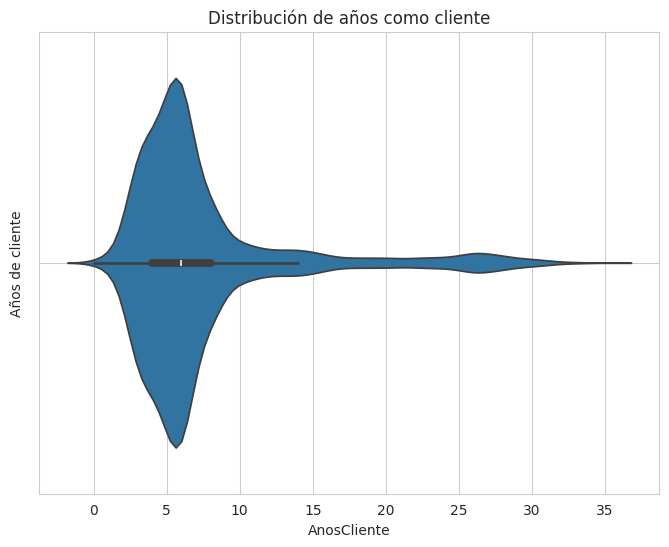

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['AnosCliente'])
plt.title('Distribución de años como cliente')
plt.ylabel('Años de cliente')
plt.grid(True)
plt.show()

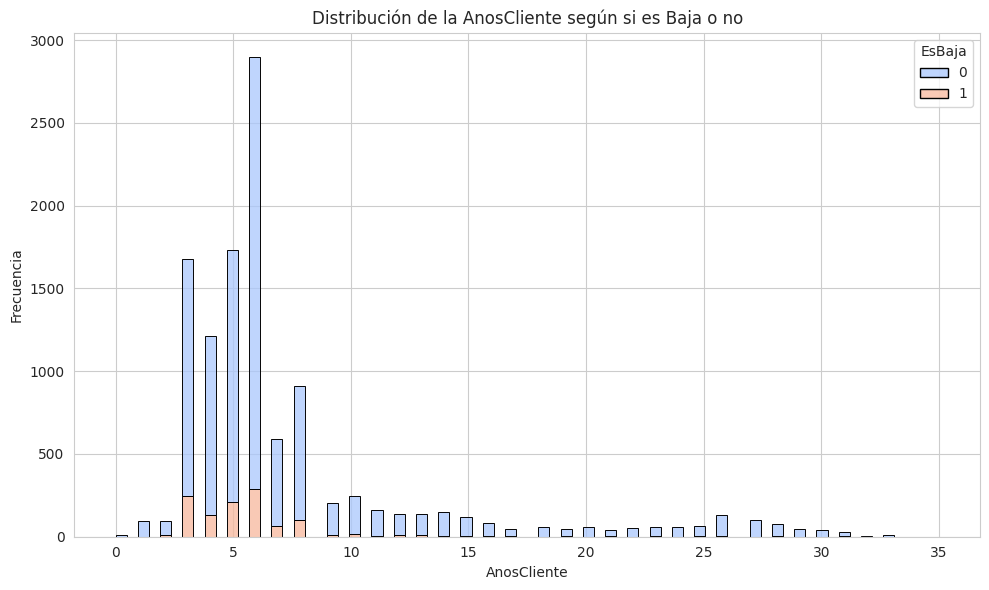

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AnosCliente', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('AnosCliente')
plt.ylabel('Frecuencia')
plt.title('Distribución de la AnosCliente según si es Baja o no')

# Mostrar el histograma
plt.tight_layout()
plt.show()

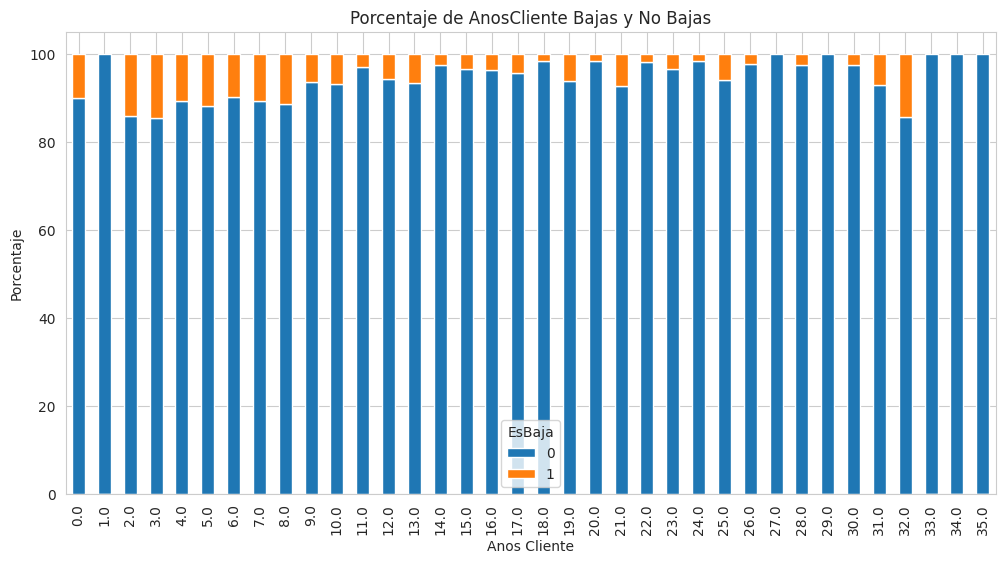

In [36]:
# Calcular el conteo de cada valor en la columna 'Edad' para cada categoría de 'EsBaja'
conteo_por_edad = df.groupby(['AnosCliente', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'Edad' para cada categoría de 'EsBaja'
porcentaje_por_edad = conteo_por_edad.div(conteo_por_edad.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje_por_edad.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de AnosCliente Bajas y No Bajas')
ax.set_xlabel('Anos Cliente')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas con 'ConGestorSubAgente', 'ConGestorAsignado'

In [37]:
df['ConGestorSubAgente'] = df['ConGestorSubAgente'].astype(int)
df['ConGestorAsignado'] = df['ConGestorAsignado'].astype(int)

In [38]:
funciones.analizar_columna(df, 'ConGestorSubAgente')

[0, 1]

Valor '0': 6887 registros

Valor '1': 4509 registros

0    60.433485
1    39.566515
Name: ConGestorSubAgente, dtype: float64


In [39]:
funciones.analizar_columna(df, 'ConGestorAsignado')

[0, 1]

Valor '0': 8434 registros

Valor '1': 2962 registros

0    74.008424
1    25.991576
Name: ConGestorAsignado, dtype: float64


In [40]:
# Contar los valores únicos en ambas columnas
conteo_asignado = df['ConGestorAsignado'].value_counts()
conteo_subagente = df['ConGestorSubAgente'].value_counts()

# Combinar la información en un nuevo dataframe
data = {
    'ConGestorAsignado': conteo_asignado,
    'ConGestorSubAgente': conteo_subagente
}

conteo_combinado = pd.DataFrame(data)
print("Cantidad de registros con diferentes combinaciones de valores:")
print(conteo_combinado)

# Contar registros con valores 0 o 1 en ambas columnas
cantidad_00 = ((df['ConGestorAsignado'] == 0) & (df['ConGestorSubAgente'] == 0)).sum()
cantidad_01 = ((df['ConGestorAsignado'] == 0) & (df['ConGestorSubAgente'] == 1)).sum()
cantidad_10 = ((df['ConGestorAsignado'] == 1) & (df['ConGestorSubAgente'] == 0)).sum()
cantidad_11 = ((df['ConGestorAsignado'] == 1) & (df['ConGestorSubAgente'] == 1)).sum()

print("\nCantidad de registros con diferentes combinaciones de valores:")
print(f"00, No tiene ningún tipo gestor  : {cantidad_00}")
print(f"01: Tiene solo Gestor Subagente : {cantidad_01}")
print(f"10: Tiene solo Gestor Asignado : {cantidad_10}")
print(f"11: Tiene ambos gestores : {cantidad_11}")

Cantidad de registros con diferentes combinaciones de valores:
   ConGestorAsignado  ConGestorSubAgente
0               8434                6887
1               2962                4509

Cantidad de registros con diferentes combinaciones de valores:
00, No tiene ningún tipo gestor  : 6867
01: Tiene solo Gestor Subagente : 1567
10: Tiene solo Gestor Asignado : 20
11: Tiene ambos gestores : 2942


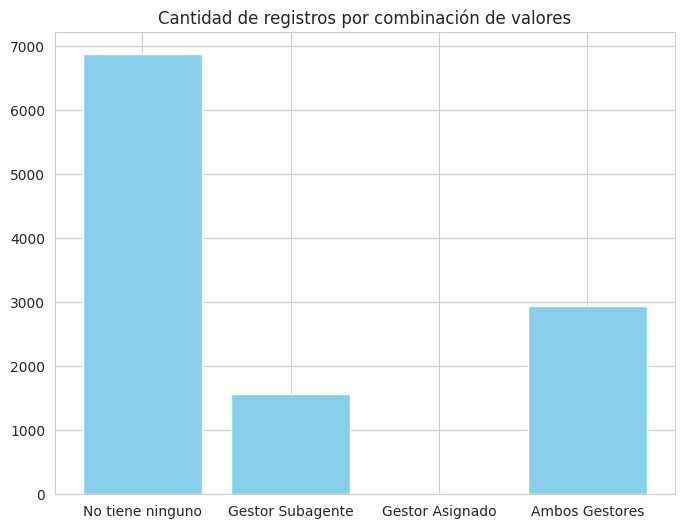

In [41]:
combinaciones = ['No tiene ninguno', 'Gestor Subagente', 'Gestor Asignado', 'Ambos Gestores']
cantidades = [cantidad_00, cantidad_01, cantidad_10, cantidad_11]

# Graficar el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combinaciones, cantidades, color='skyblue')
plt.title('Cantidad de registros por combinación de valores')
plt.show()

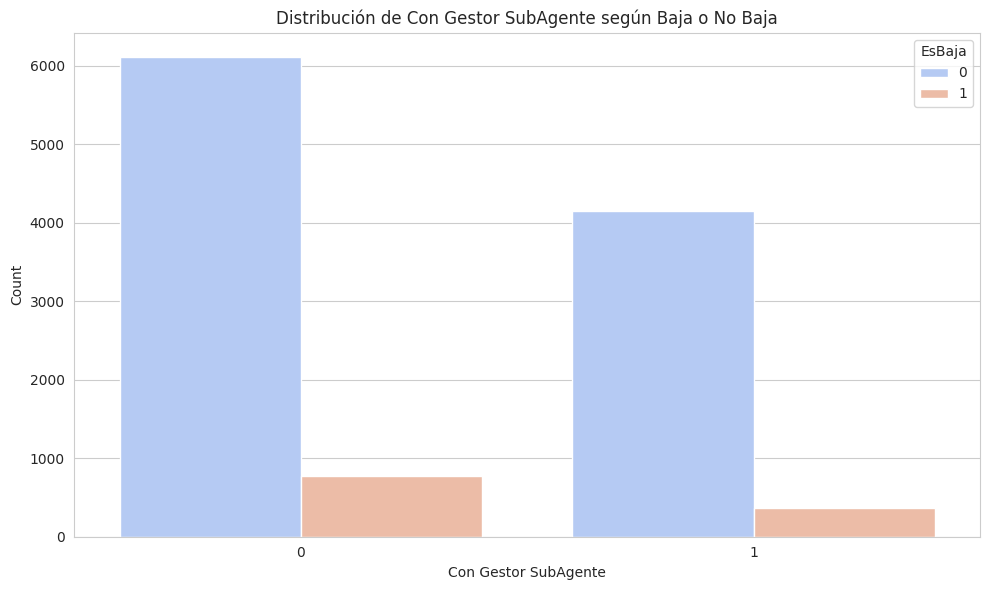

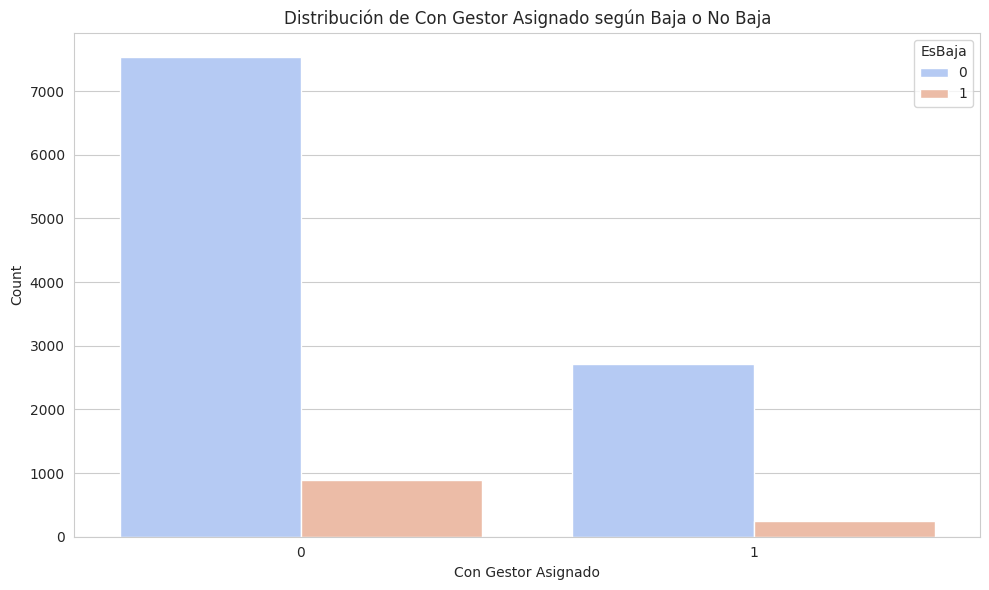

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Graficar la proporción de cada valor en 'ConGestorSubAgente' según 'EsBaja'
sns.countplot(x='ConGestorSubAgente', hue='EsBaja', data=df, palette='coolwarm')

# Añadir etiquetas y título
plt.xlabel('Con Gestor SubAgente')
plt.ylabel('Count')
plt.title('Distribución de Con Gestor SubAgente según Baja o No Baja')

# Mostrar el gráfico
plt.legend(title='EsBaja')
plt.tight_layout()
plt.show()

# Repetir el proceso para 'ConGestorAsignado'
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x='ConGestorAsignado', hue='EsBaja', data=df, palette='coolwarm')
plt.xlabel('Con Gestor Asignado')
plt.ylabel('Count')
plt.title('Distribución de Con Gestor Asignado según Baja o No Baja')
plt.legend(title='EsBaja')
plt.tight_layout()
plt.show()

#Columnas 'sCodProvincia', 'sCodPostal'

In [43]:
df['sCodProvincia'] = df['sCodProvincia'].astype(int)


In [44]:
funciones.analizar_columna(df, 'sCodProvincia')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 67, 80, 86, 88, 89]

Valor '0': 376 registros

Valor '1': 7 registros

Valor '2': 3 registros

Valor '3': 26 registros

Valor '4': 13 registros

Valor '5': 8 registros

Valor '6': 17 registros

Valor '7': 24 registros

Valor '8': 3217 registros

Valor '9': 10 registros

Valor '10': 10 registros

Valor '11': 21 registros

Valor '12': 12 registros

Valor '13': 11 registros

Valor '14': 38 registros

Valor '15': 44 registros

Valor '16': 28 registros

Valor '17': 3028 registros

Valor '18': 13 registros

Valor '19': 46 registros

Valor '20': 3 registros

Valor '21': 7 registros

Valor '22': 3 registros

Valor '23': 128 registros

Valor '24': 1678 registros

Valor '25': 12 registros

Valor '26': 6 registros

Valor '27': 5 registros

Valor '28': 1684 registros

Valor '29': 53 registros

Valor '30': 

In [45]:
df = df.drop(columns=['sCodProvincia'])

In [46]:
funciones.analizar_columna(df, 'sCodPostal')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 61, 67, 76, 80, 86, 87, 88, 89]

Valor '0': 56 registros

Valor '1': 7 registros

Valor '2': 4 registros

Valor '3': 25 registros

Valor '4': 14 registros

Valor '5': 8 registros

Valor '6': 17 registros

Valor '7': 24 registros

Valor '8': 3205 registros

Valor '9': 10 registros

Valor '10': 10 registros

Valor '11': 21 registros

Valor '12': 13 registros

Valor '13': 11 registros

Valor '14': 39 registros

Valor '15': 44 registros

Valor '16': 40 registros

Valor '17': 3064 registros

Valor '18': 13 registros

Valor '19': 46 registros

Valor '20': 4 registros

Valor '21': 8 registros

Valor '22': 4 registros

Valor '23': 127 registros

Valor '24': 1678 registros

Valor '25': 12 registros

Valor '26': 6 registros

Valor '27': 5 registros

Valor '28': 1871 registros

Valor '29': 55 registros

V

(-1.0999990168250284,
 1.0999986952294472,
 -1.0999996810069872,
 1.0999999848098565)

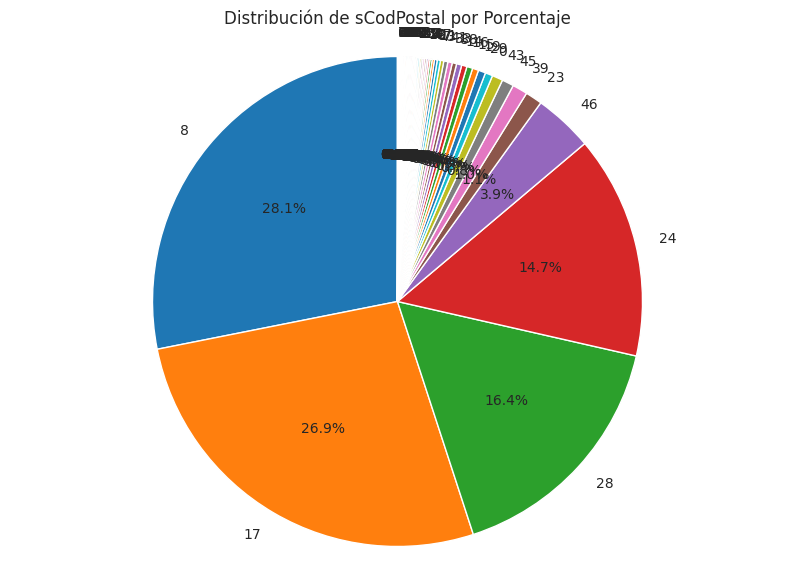

In [47]:
frecuencia_sCodPostal = df['sCodPostal'].value_counts()

# Calcular los porcentajes
porcentajes = frecuencia_sCodPostal / frecuencia_sCodPostal.sum() * 100

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sCodPostal por Porcentaje')
plt.axis('equal')

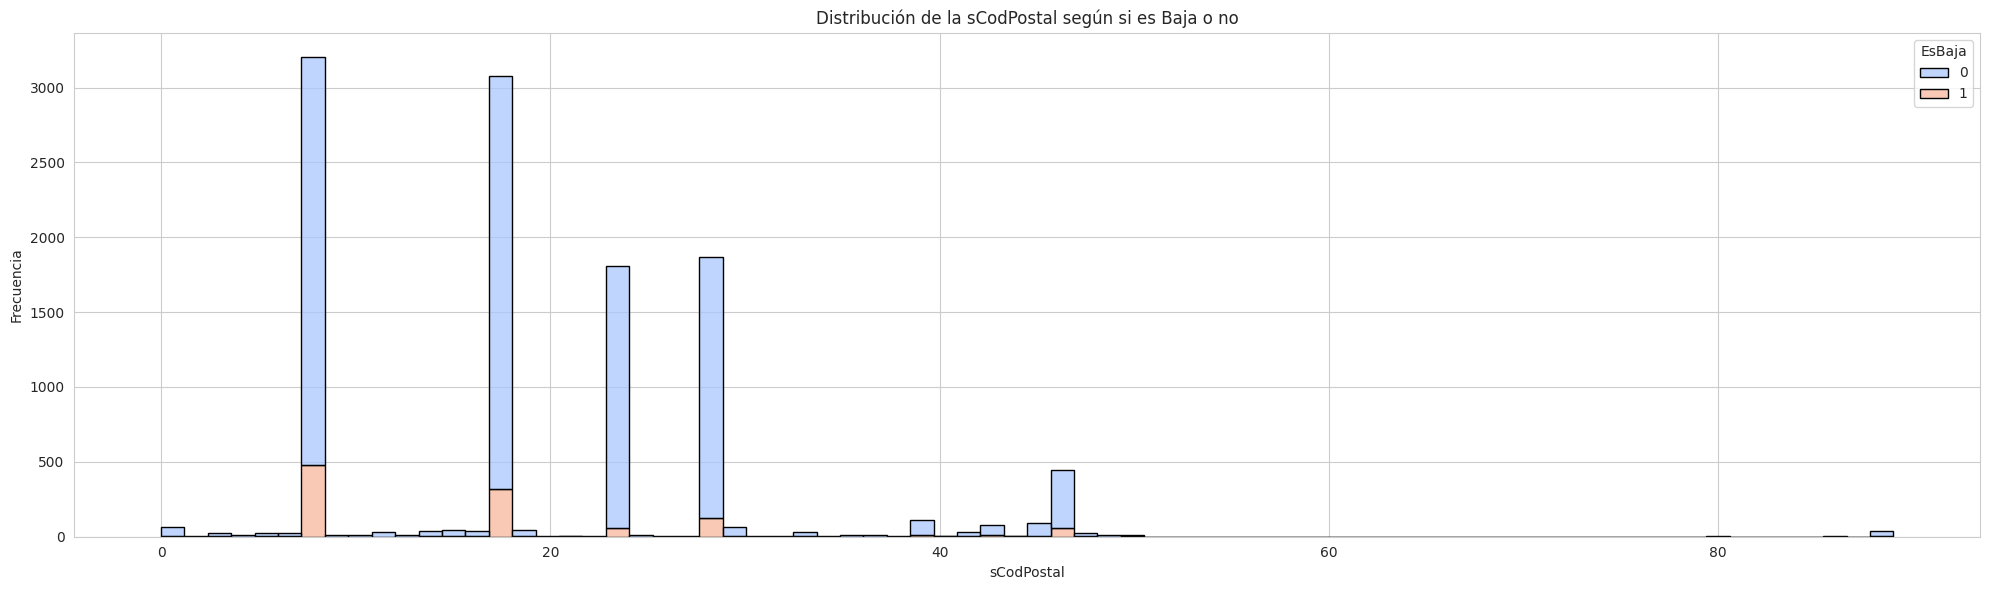

In [48]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='sCodPostal', bins=74, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')

plt.xlabel('sCodPostal')
plt.ylabel('Frecuencia')
plt.title('Distribución de la sCodPostal según si es Baja o no')
plt.tight_layout()
plt.show()

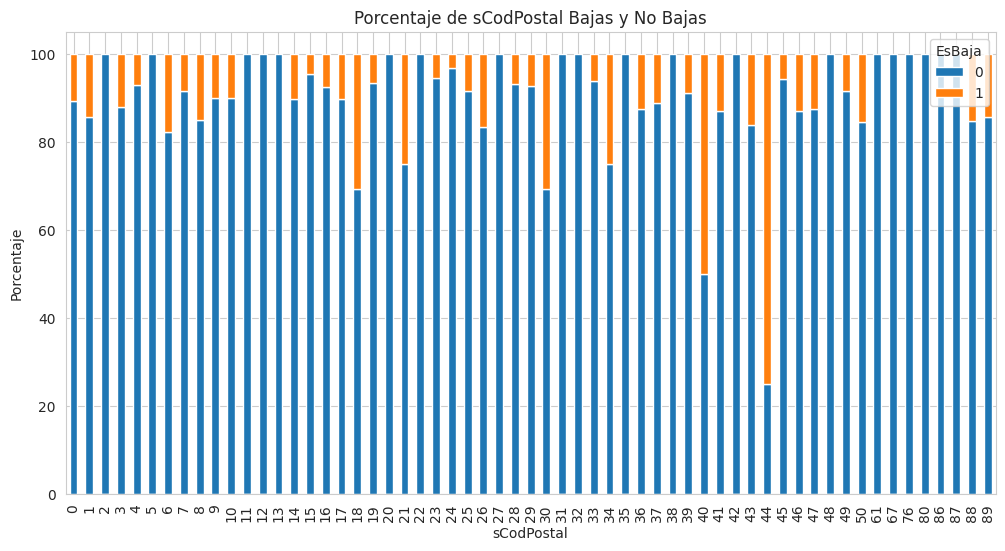

In [49]:
# Calcular el conteo de cada valor en la columna 'sCodPostal' para cada categoría de 'EsBaja'
conteo = df.groupby(['sCodPostal', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'sCodPostal' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de sCodPostal Bajas y No Bajas')
ax.set_xlabel('sCodPostal')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas 'sNomEstadoCivil'

In [50]:
funciones.analizar_columna(df, 'sNomEstadoCivil')

[1, 2, 3, 4, 5, 6, 7]

Valor '1': 1587 registros

Valor '2': 3559 registros

Valor '3': 52 registros

Valor '4': 6107 registros

Valor '5': 10 registros

Valor '6': 24 registros

Valor '7': 57 registros

1    13.925939
2    31.230256
3     0.456300
4    53.588979
5     0.087750
6     0.210600
7     0.500176
Name: sNomEstadoCivil, dtype: float64


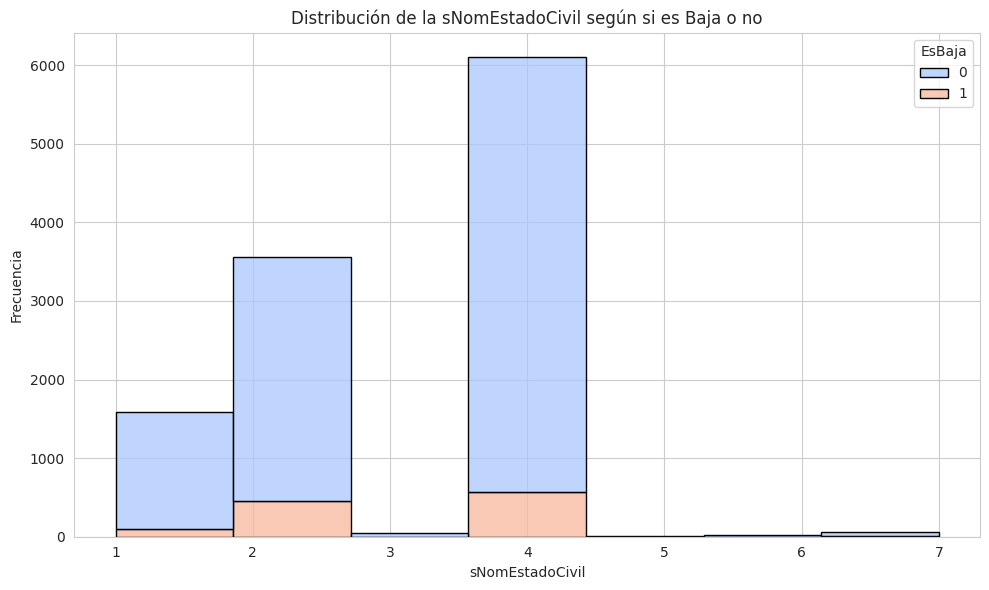

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sNomEstadoCivil', bins=7, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('sNomEstadoCivil')
plt.ylabel('Frecuencia')
plt.title('Distribución de la sNomEstadoCivil según si es Baja o no')
plt.tight_layout()
plt.show()

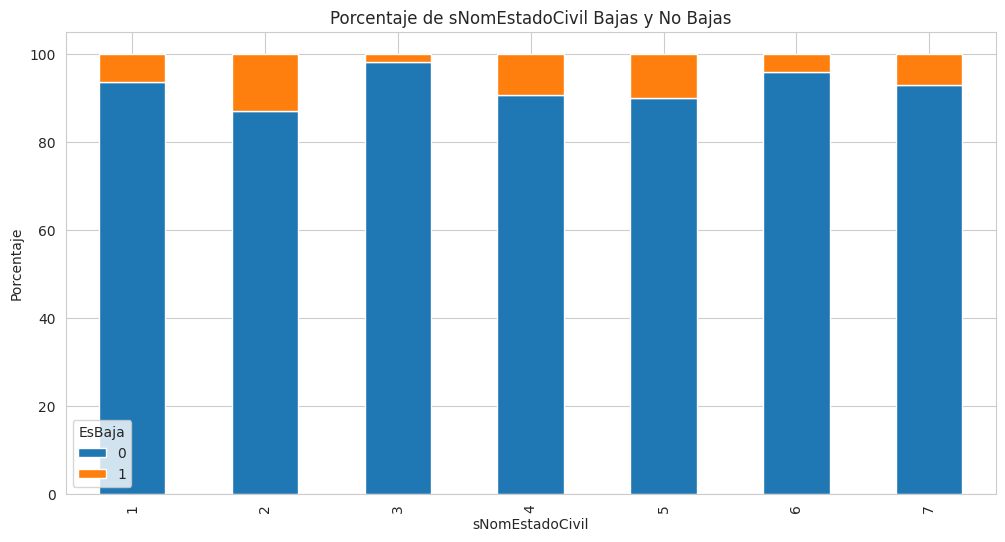

In [52]:
# Calcular el conteo de cada valor en la columna 'sNomEstadoCivil' para cada categoría de 'EsBaja'
conteo = df.groupby(['sNomEstadoCivil', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'sNomEstadoCivil' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de sNomEstadoCivil Bajas y No Bajas')
ax.set_xlabel('sNomEstadoCivil')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

# Columnas 'Dominio', 'SEXO', 'TipoPersona'

In [53]:
funciones.analizar_columna(df, 'Dominio')

[0, 1]

Valor '0': 5621 registros

Valor '1': 5775 registros

0    49.324324
1    50.675676
Name: Dominio, dtype: float64


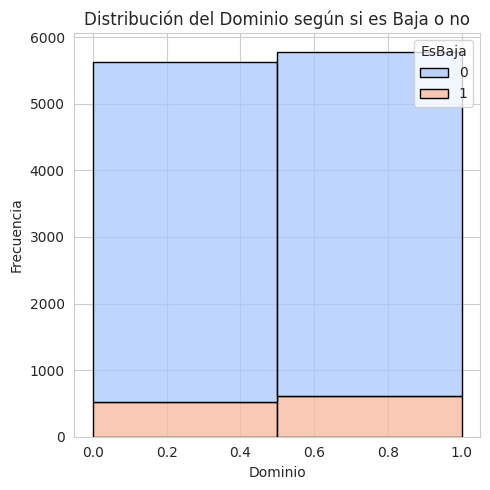

In [54]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Dominio', bins=2, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('Dominio')
plt.ylabel('Frecuencia')
plt.title('Distribución del Dominio según si es Baja o no')
plt.tight_layout()
plt.show()

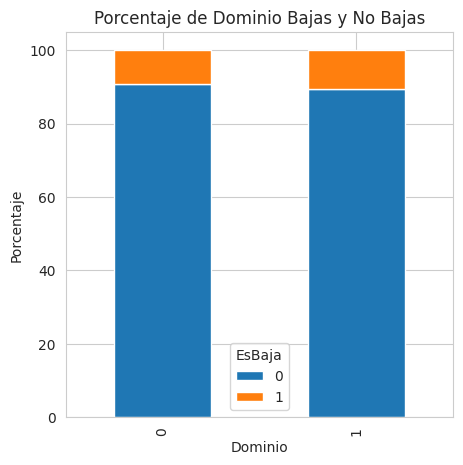

In [55]:
# Calcular el conteo de cada valor en la columna 'Dominio' para cada categoría de 'EsBaja'
conteo = df.groupby(['Dominio', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'Dominio' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Dominio Bajas y No Bajas')
ax.set_xlabel('Dominio')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [56]:
funciones.analizar_columna(df, 'SEXO')

[1, 2, 3]

Valor '1': 5899 registros

Valor '2': 3078 registros

Valor '3': 2419 registros

1    51.763777
2    27.009477
3    21.226746
Name: SEXO, dtype: float64


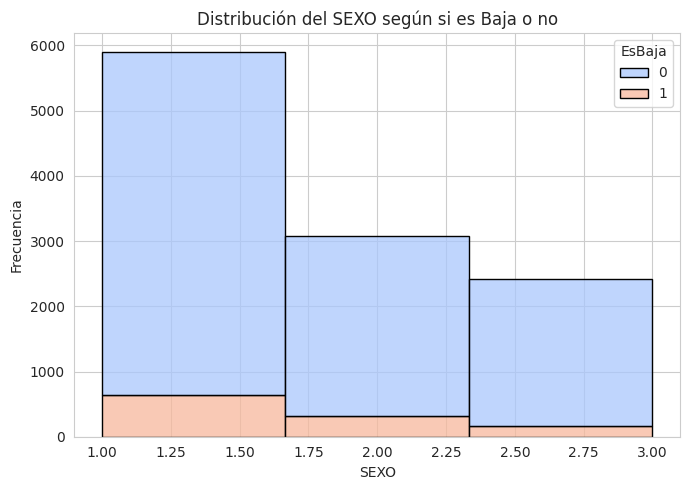

In [57]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='SEXO', bins=3, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.title('Distribución del SEXO según si es Baja o no')
plt.tight_layout()
plt.show()

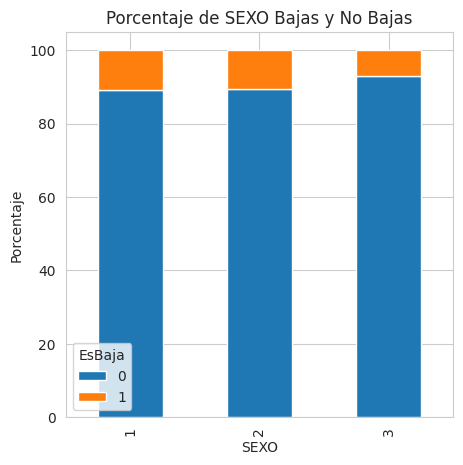

In [58]:
# Calcular el conteo de cada valor en la columna 'SEXO' para cada categoría de 'EsBaja'
conteo = df.groupby(['SEXO', 'EsBaja']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada valor en la columna 'SEXO' para cada categoría de 'EsBaja'
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de SEXO Bajas y No Bajas')
ax.set_xlabel('SEXO')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [59]:
df.drop(columns=['SEXO'], inplace=True)

#Columna TipoPersona

In [60]:
funciones.analizar_columna(df, 'TipoPersona')

[0, 1]

Valor '0': 1369 registros

Valor '1': 10027 registros

0    12.012987
1    87.987013
Name: TipoPersona, dtype: float64


In [61]:
df['TipoPersona'] = df['TipoPersona'].astype(int)

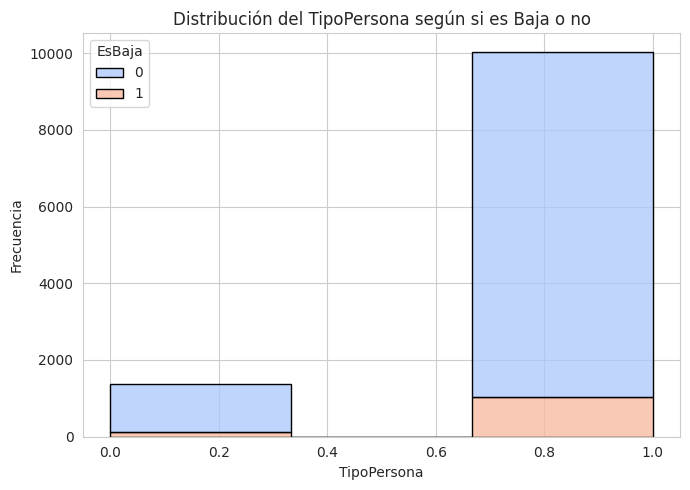

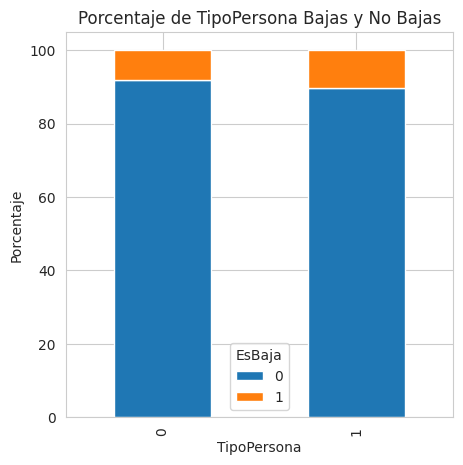

In [62]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='TipoPersona', bins=3, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('TipoPersona')
plt.ylabel('Frecuencia')
plt.title('Distribución del TipoPersona según si es Baja o no')
plt.tight_layout()
plt.show()


conteo = df.groupby(['TipoPersona', 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de TipoPersona Bajas y No Bajas')
ax.set_xlabel('TipoPersona')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#Columnas Menos0

In [63]:
grupo_0 = ['Num_Pol_Vigor_Menos0', 'NumeRecibos_Menos0', 'PrimasPagadas_Menos0',
           'Num_Siniestros_Menos0', 'Num_Pol_Vigor_Hogar_Menos0',
           'Num_Pol_Vigor_Autos_Menos0', 'Num_Pol_Vigor_Decesos_Menos0',
           'Num_Pol_Vigor_Salud_Menos0', 'Num_Pol_Vigor_PensionesVida_Menos0',
           'Num_Pol_Vigor_Resto_Menos0']

#Columnas 'Num_Pol_Vigor_Menos0'

In [64]:
funciones.analizar_columna(df, 'Num_Pol_Vigor_Menos0')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 29, 35, 36, 38, 42, 48, 75, 82, 87, 235]

Valor '0': 1138 registros

Valor '1': 6976 registros

Valor '2': 1719 registros

Valor '3': 682 registros

Valor '4': 365 registros

Valor '5': 167 registros

Valor '6': 117 registros

Valor '7': 66 registros

Valor '8': 42 registros

Valor '9': 25 registros

Valor '10': 17 registros

Valor '11': 19 registros

Valor '12': 10 registros

Valor '13': 5 registros

Valor '14': 7 registros

Valor '15': 3 registros

Valor '16': 5 registros

Valor '17': 2 registros

Valor '18': 4 registros

Valor '19': 7 registros

Valor '20': 1 registros

Valor '21': 1 registros

Valor '22': 4 registros

Valor '23': 1 registros

Valor '26': 2 registros

Valor '27': 1 registros

Valor '29': 1 registros

Valor '35': 1 registros

Valor '36': 1 registros

Valor '38': 1 registros

Valor '42': 1 registros

Valor '48': 1 registros

Valor '75': 1 registros

Valor '82': 1 registros



In [65]:
"""PODRIAMOS INTENTAR QUE TODO LO QUE SE CONSIDERE FLOTA METERLO EN UN GRUPO"""

'PODRIAMOS INTENTAR QUE TODO LO QUE SE CONSIDERE FLOTA METERLO EN UN GRUPO'

In [66]:
valores_unicos_grupo = df['grupo'].unique()

for grupo in valores_unicos_grupo:
    df_filtrado = df[(df['Num_Pol_Vigor_Menos0'] > 10) & (df['grupo'] == grupo)]

    print(f'Valores para el grupo {grupo} cuando Num_Pol_Vigor_Menos0 > 10:')
    print(df_filtrado[['grupo', 'Num_Pol_Vigor_Menos0']])

Valores para el grupo GES0 cuando Num_Pol_Vigor_Menos0 > 10:
     grupo  Num_Pol_Vigor_Menos0
21    GES0                    13
97    GES0                    14
99    GES0                    11
101   GES0                    42
104   GES0                    14
122   GES0                    11
152   GES0                    11
154   GES0                    12
197   GES0                    22
265   GES0                    11
268   GES0                    17
279   GES0                    11
374   GES0                    11
445   GES0                    11
607   GES0                    19
745   GES0                    18
1164  GES0                    12
1384  GES0                    11
1668  GES0                    12
Valores para el grupo TUR0 cuando Num_Pol_Vigor_Menos0 > 10:
     grupo  Num_Pol_Vigor_Menos0
2038  TUR0                    21
2052  TUR0                    36
2484  TUR0                   235
2485  TUR0                    18
2489  TUR0                    20
2490  TUR0          

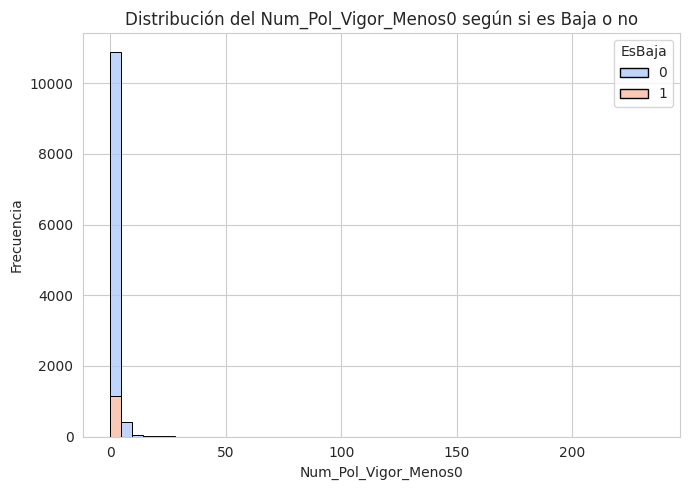

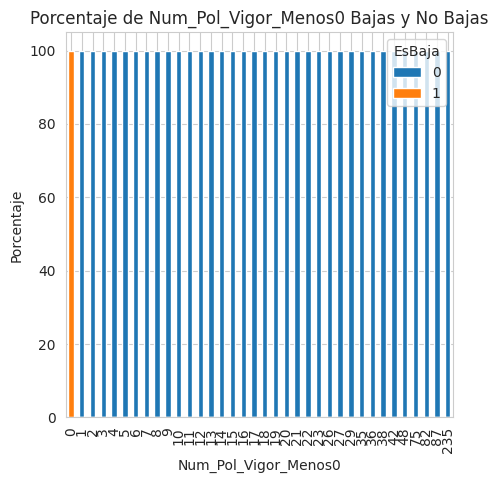

In [67]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Num_Pol_Vigor_Menos0', bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel('Num_Pol_Vigor_Menos0')
plt.ylabel('Frecuencia')
plt.title('Distribución del Num_Pol_Vigor_Menos0 según si es Baja o no')
plt.tight_layout()
plt.show()


conteo = df.groupby(['Num_Pol_Vigor_Menos0', 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(5, 5))
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porcentaje de Num_Pol_Vigor_Menos0 Bajas y No Bajas')
ax.set_xlabel('Num_Pol_Vigor_Menos0')
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

In [68]:
# Filtrar el DataFrame para aquellos valores donde 'EsBaja' es igual a 1
df_esbaja_1 = df[df['EsBaja'] == 1]
valores_con_esbaja_1 = df_esbaja_1['Num_Pol_Vigor_Menos0'].unique()
print("Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1:")
print(valores_con_esbaja_1)

total_esbaja_1 = len(df_esbaja_1)

if total_esbaja_1 == 1:
    valor_esbaja_1 = df_esbaja_1['Num_Pol_Vigor_Menos0'].iloc[0]
    print("El valor en 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1 es:", valor_esbaja_1)
    print("Número total de valores en 'EsBaja' que son iguales a 1:", total_esbaja_1)
else:
    print("Número total de valores en 'EsBaja' que son iguales a 1:", total_esbaja_1)

Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 1:
[0]
Número total de valores en 'EsBaja' que son iguales a 1: 1138


In [69]:
df_esbaja_0 = df[df['EsBaja'] == 0]

valores_con_esbaja_0 = df_esbaja_0['Num_Pol_Vigor_Menos0'].unique()
print("Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 0:")
print(valores_con_esbaja_0)
total_esbaja_0 = len(df_esbaja_0)

Valores de 'Num_Pol_Vigor_Menos0' donde 'EsBaja' es igual a 0:
[  1   7   2   6   4   3  13   8   9   5  10  14  11  42  12  22  17  19
  18  21  36 235  20  15  48  38  75  23  26  87  16  27  82  35  29]


# COLUMNA 'NumeRecibos_Menos0'

In [70]:
funciones.analizar_columna(df, 'NumeRecibos_Menos0')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 59, 61, 62, 63, 64, 70, 73, 74, 78, 79, 84, 85, 93, 97, 103, 104, 119, 124, 127, 132, 169, 206, 555]

Valor '0': 1308 registros

Valor '1': 4655 registros

Valor '2': 2093 registros

Valor '3': 900 registros

Valor '4': 706 registros

Valor '5': 257 registros

Valor '6': 235 registros

Valor '7': 109 registros

Valor '8': 106 registros

Valor '9': 69 registros

Valor '10': 41 registros

Valor '11': 44 registros

Valor '12': 381 registros

Valor '13': 85 registros

Valor '14': 66 registros

Valor '15': 36 registros

Valor '16': 29 registros

Valor '17': 15 registros

Valor '18': 16 registros

Valor '19': 20 registros

Valor '20': 19 registros

Valor '21': 11 registros

Valor '22': 10 registros

Valor '23': 7 registros

Valor '24': 30 registros

Valor '25': 8 registros

Valor '26': 10 reg

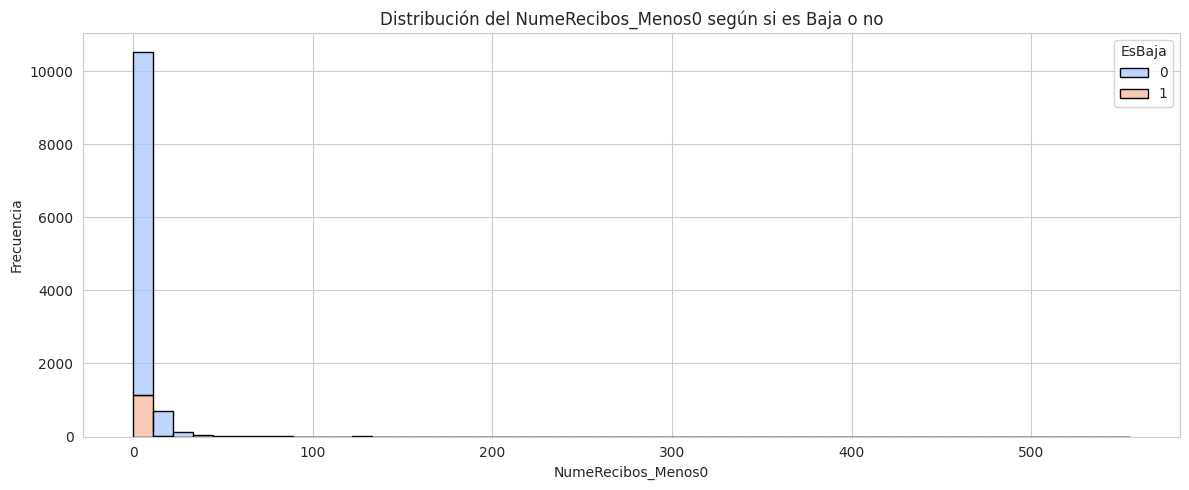

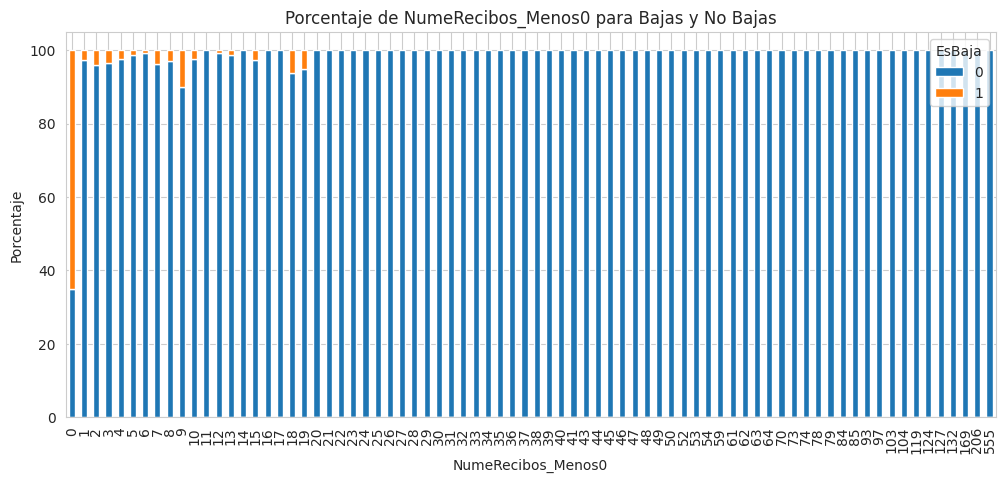

In [71]:
c = 'NumeRecibos_Menos0'

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x=c, bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel(c)
plt.ylabel('Frecuencia')
plt.title(f'Distribución del {c} según si es Baja o no')  # Corregido aquí
plt.tight_layout()
plt.show()

conteo = df.groupby([c, 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 5))  # Ajusté el tamaño de la figura
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title(f'Porcentaje de {c} para Bajas y No Bajas')  # Corregido aquí
ax.set_xlabel(c)
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()


In [72]:
# Calcular estadísticas descriptivas para ambas columnas
estadisticas_NumeRecibos = df['NumeRecibos_Menos0'].describe()
estadisticas_Num_Pol_Vigor = df['Num_Pol_Vigor_Menos0'].describe()

print("Estadísticas de 'NumeRecibos_Menos0':")
print(estadisticas_NumeRecibos)
print("\nEstadísticas de 'Num_Pol_Vigor_Menos0':")
print(estadisticas_Num_Pol_Vigor)

Estadísticas de 'NumeRecibos_Menos0':
count    11396.000000
mean         3.278256
std          8.385839
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        555.000000
Name: NumeRecibos_Menos0, dtype: float64

Estadísticas de 'Num_Pol_Vigor_Menos0':
count    11396.000000
mean         1.618463
std          3.186868
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        235.000000
Name: Num_Pol_Vigor_Menos0, dtype: float64


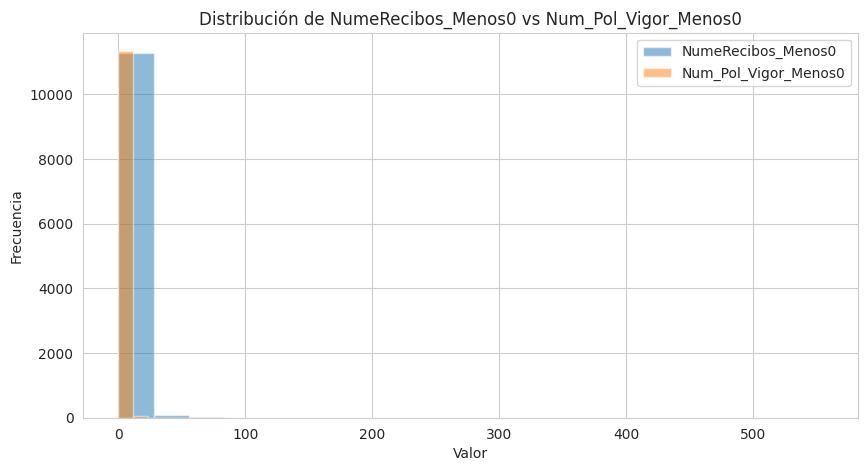

In [73]:
# Visualización de las distribuciones de ambas columnas
plt.figure(figsize=(10, 5))
plt.hist(df['NumeRecibos_Menos0'], bins=20, alpha=0.5, label='NumeRecibos_Menos0')
plt.hist(df['Num_Pol_Vigor_Menos0'], bins=20, alpha=0.5, label='Num_Pol_Vigor_Menos0')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de NumeRecibos_Menos0 vs Num_Pol_Vigor_Menos0')
plt.legend()
plt.show()

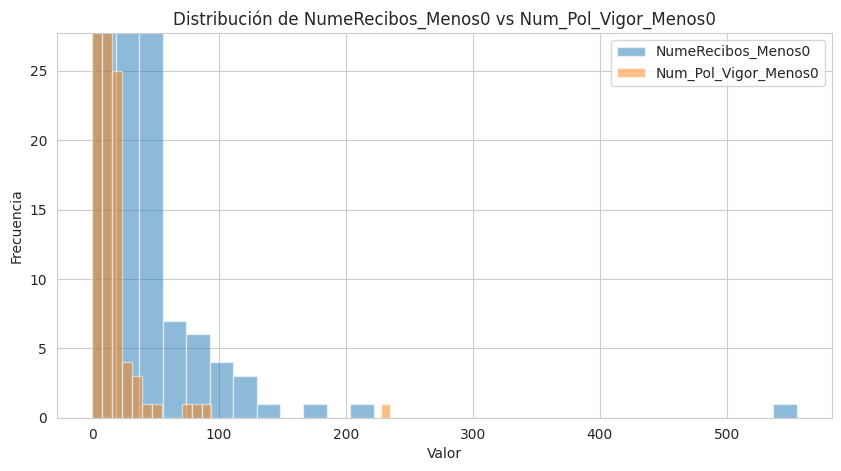

In [74]:
# Obtener el valor máximo de ambas columnas
max_value = max(df['NumeRecibos_Menos0'].max(), df['Num_Pol_Vigor_Menos0'].max())

# Visualización de las distribuciones de ambas columnas
plt.figure(figsize=(10, 5))
plt.hist(df['NumeRecibos_Menos0'], bins=30, alpha=0.5, label='NumeRecibos_Menos0')
plt.hist(df['Num_Pol_Vigor_Menos0'], bins=30, alpha=0.5, label='Num_Pol_Vigor_Menos0')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de NumeRecibos_Menos0 vs Num_Pol_Vigor_Menos0')
plt.legend()

# Establecer el límite superior del eje y como el 90% del valor máximo para evitar valores atípicos
plt.ylim(0, max_value * 0.05)

plt.show()

#Columna PrimasPagadas_Menos0

Hay que valorar la posibilidad de hacer una discretizacion de variables, esto implica que luego los datos habran que meterse según esa categoría.
Además hay un muchos valores distintos, esta columna requiere mucho más trabajo, queda pendiente agrupar bien y que me contesten si los numeros negativos tienen sentido en este caso.

Crearia una nueva columna con cada una.

In [75]:
#funciones.analizar_columna(df, 'PrimasPagadas_Menos0')

"""PODRIAMOS VALORAR HACER UNA DISCRETIZACION DE VARIABLES"""

'PODRIAMOS VALORAR HACER UNA DISCRETIZACION DE VARIABLES'

In [76]:
df['PrimasPagadas_Menos0'].describe()

count     11396.000000
mean        704.813351
std        5346.672912
min     -150109.020000
25%         191.385000
50%         369.965000
75%         647.257500
max      329877.970000
Name: PrimasPagadas_Menos0, dtype: float64

In [77]:
conteo_valores_menos_0 = (df['PrimasPagadas_Menos0'] < 0).sum()
print("Cantidad de valores menores que 0:", conteo_valores_menos_0)

Cantidad de valores menores que 0: 57


In [86]:
filas_menos_0 = df.loc[df['PrimasPagadas_Menos0'] < 0, ['MEDCOD', 'PrimasPagadas_Menos0']]

print(filas_menos_0)

Empty DataFrame
Columns: [MEDCOD, PrimasPagadas_Menos0]
Index: []


In [79]:
conteo_valores_mas_1000 = (df['PrimasPagadas_Menos0'] > 1000).sum()
print("Cantidad de valores más de 1000:", conteo_valores_mas_1000)

Cantidad de valores más de 1000: 1605


In [82]:
df = df[df['PrimasPagadas_Menos0'] <= 1000]

# Convertir valores negativos a positivos en la columna 'PrimasPagadas_Menos0'
df['PrimasPagadas_Menos0'] = df['PrimasPagadas_Menos0'].abs()

max_value = int(df['PrimasPagadas_Menos0'].max())
bins = list(range(0, max_value + 101, 100))

labels = [f'{i} a {i + 99}' for i in range(0, max_value + 1, 100)]
df['PrimasPagadas_Agrupadas'] = pd.cut(df['PrimasPagadas_Menos0'], bins=bins, labels=labels, include_lowest=True)

print(df[['PrimasPagadas_Menos0', 'PrimasPagadas_Agrupadas']])

       PrimasPagadas_Menos0 PrimasPagadas_Agrupadas
0                    392.61               300 a 399
2                    628.31               600 a 699
3                    249.81               200 a 299
4                    296.51               200 a 299
5                    162.75               100 a 199
...                     ...                     ...
11391                  0.00                  0 a 99
11392                132.12               100 a 199
11393                  0.00                  0 a 99
11394                  0.00                  0 a 99
11395                  0.00                  0 a 99

[9757 rows x 2 columns]


<ipython-input-82-30213e260ca3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrimasPagadas_Menos0'] = df['PrimasPagadas_Menos0'].abs()
<ipython-input-82-30213e260ca3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrimasPagadas_Agrupadas'] = pd.cut(df['PrimasPagadas_Menos0'], bins=bins, labels=labels, include_lowest=True)


In [83]:
df['PrimasPagadas_Agrupadas'].value_counts().sort_index()

0 a 99         1738
100 a 199      1193
200 a 299      1538
300 a 399      1653
400 a 499      1270
500 a 599       808
600 a 699       576
700 a 799       439
800 a 899       300
900 a 999       242
1000 a 1099       0
Name: PrimasPagadas_Agrupadas, dtype: int64

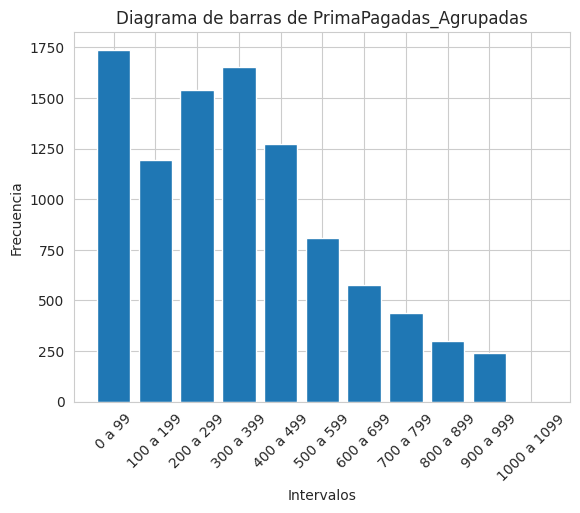

In [89]:
# Obtener la frecuencia de cada intervalo
frecuencia_intervalos = df['PrimasPagadas_Agrupadas'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(frecuencia_intervalos.index, frecuencia_intervalos)

# Añadir etiquetas y título
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Diagrama de barras de PrimaPagadas_Agrupadas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

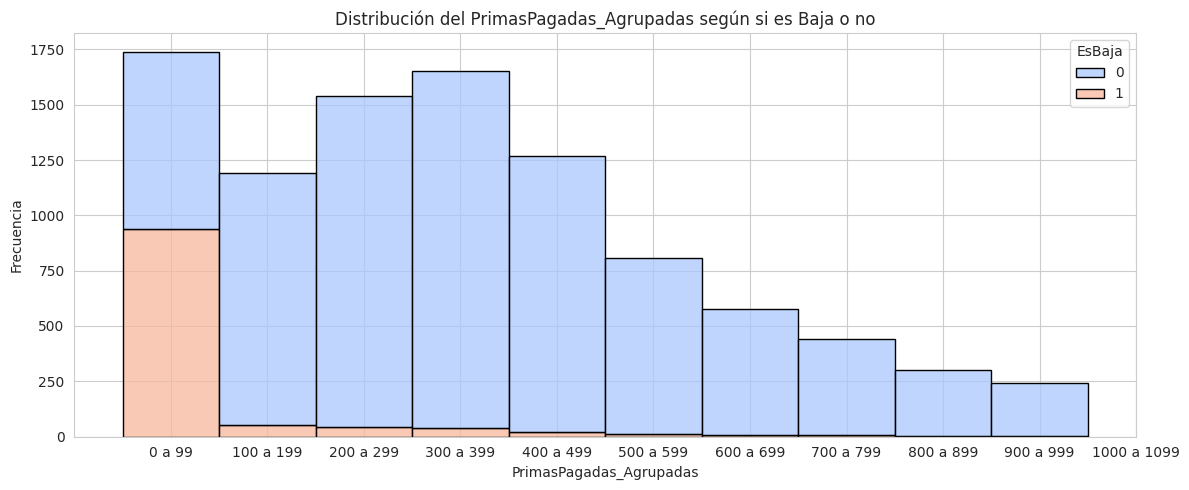

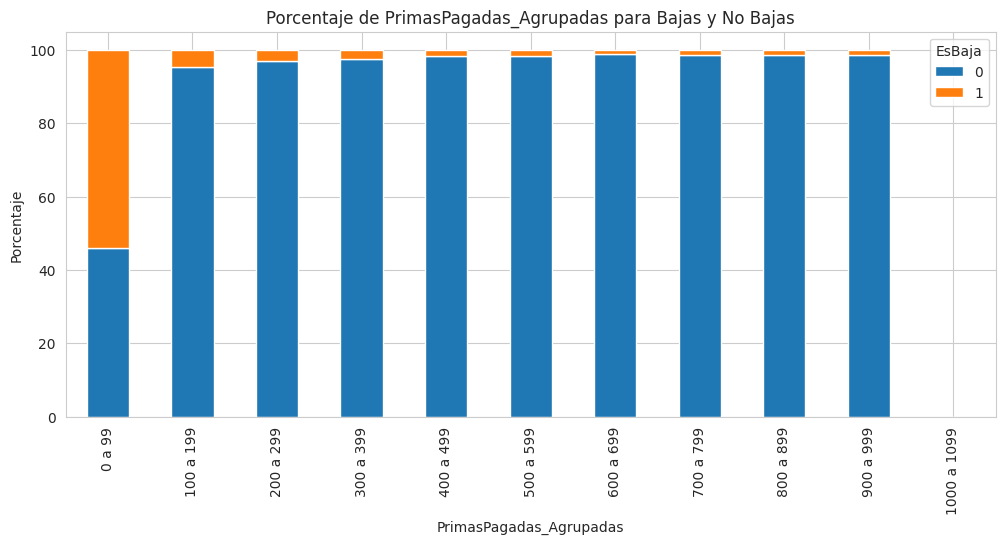

In [91]:
c = 'PrimasPagadas_Agrupadas'

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x=c, bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel(c)
plt.ylabel('Frecuencia')
plt.title(f'Distribución del {c} según si es Baja o no')  # Corregido aquí
plt.tight_layout()
plt.show()

conteo = df.groupby([c, 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 5))  # Ajusté el tamaño de la figura
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title(f'Porcentaje de {c} para Bajas y No Bajas')  # Corregido aquí
ax.set_xlabel(c)
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()

#'PrimasPagadas_Menos3', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos0'
Estas variables representan una evolución ¿¿¿Podríamos representarla en una nueva variable que fuera una evolución positiva o negativa??? OJO, SUCEDERIA LO MISMO QUE CON CUALQUIER OTRA COLUMNA NUEVA


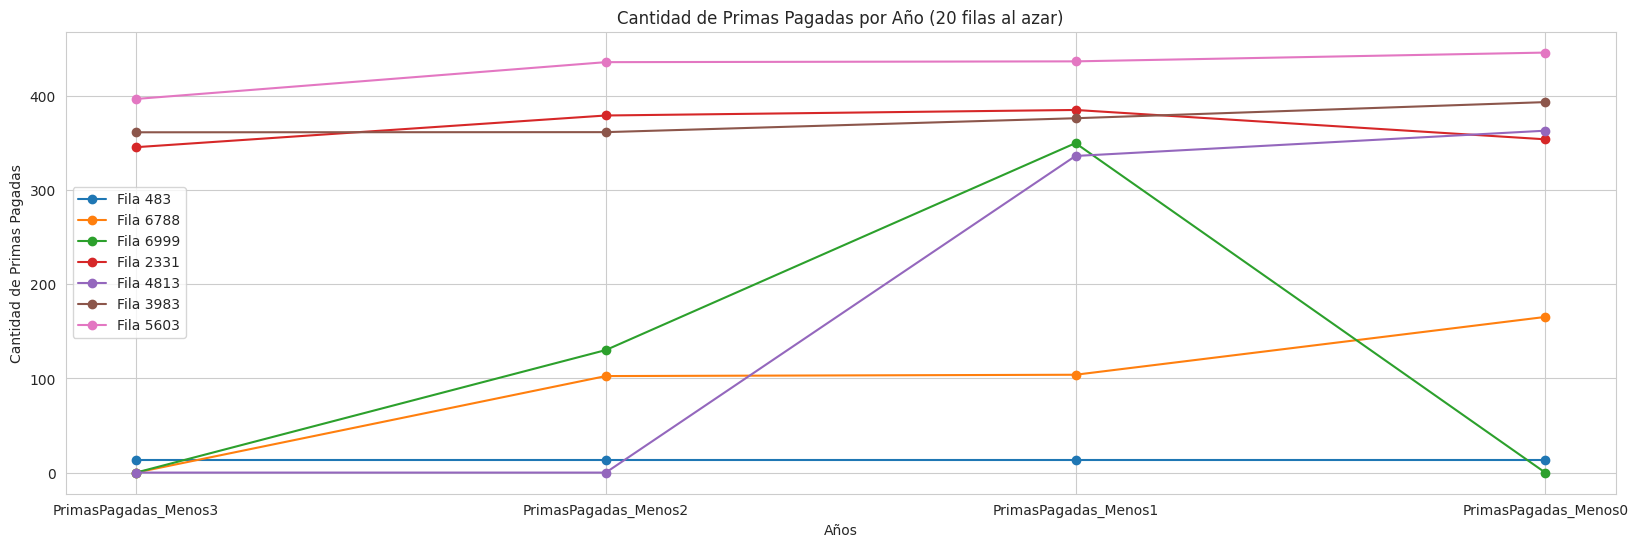

In [143]:
filas_azar = df.sample(n=7)

plt.figure(figsize=(20, 6))
# Iterar sobre cada fila seleccionada
for index, fila in filas_azar.iterrows():
    primas_pagadas = ['PrimasPagadas_Menos3', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos0']
    cantidades = [fila[columna] for columna in primas_pagadas]
    plt.plot(primas_pagadas, cantidades, marker='o', label=f'Fila {index}')

plt.xlabel('Años')
plt.ylabel('Cantidad de Primas Pagadas')
plt.title('Cantidad de Primas Pagadas por Año (20 filas al azar)')
plt.legend()

plt.grid(True)
plt.show()

Número de registro seleccionado: 2477


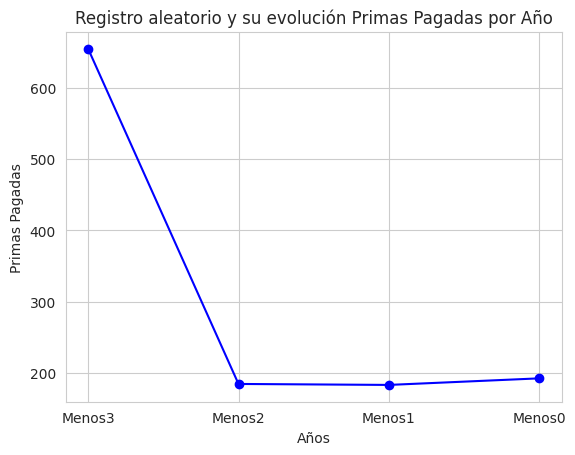

In [142]:
"""SELECCIONAMOS ALEATORIAMENTE UN VALOR PARA VER COMO EVOLUCIONA EL PAGO DE LAS PRIMAS"""
fila_aleatoria = df[['MEDCOD', 'PrimasPagadas_Menos3', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos0', 'EsBaja']].dropna().sample(n=1)

print("Número de registro seleccionado:", fila_aleatoria.index[0])
primas = fila_aleatoria[['PrimasPagadas_Menos3', 'PrimasPagadas_Menos2', 'PrimasPagadas_Menos1', 'PrimasPagadas_Menos0']].values.flatten()
es_baja = fila_aleatoria['EsBaja'].values[0]
color_linea = 'red' if es_baja else 'blue'
plt.plot(range(4), primas, marker='o', color=color_linea)
plt.xlabel('Años')
plt.ylabel('Primas Pagadas')
plt.title('Registro aleatorio y su evolución Primas Pagadas por Año')
plt.xticks(range(4), ['Menos3', 'Menos2', 'Menos1', 'Menos0'])
plt.grid(True)
plt.show()

#COLUMNA 'Num_Siniestros_Menos0

In [145]:
funciones.analizar_columna(df, 'Num_Siniestros_Menos0')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]

Valor '0': 8030 registros

Valor '1': 1114 registros

Valor '2': 366 registros

Valor '3': 135 registros

Valor '4': 63 registros

Valor '5': 23 registros

Valor '6': 14 registros

Valor '7': 6 registros

Valor '8': 2 registros

Valor '9': 1 registros

Valor '13': 3 registros

0     82.299887
1     11.417444
2      3.751153
3      1.383622
4      0.645690
5      0.235728
6      0.143487
7      0.061494
8      0.020498
9      0.010249
13     0.030747
Name: Num_Siniestros_Menos0, dtype: float64


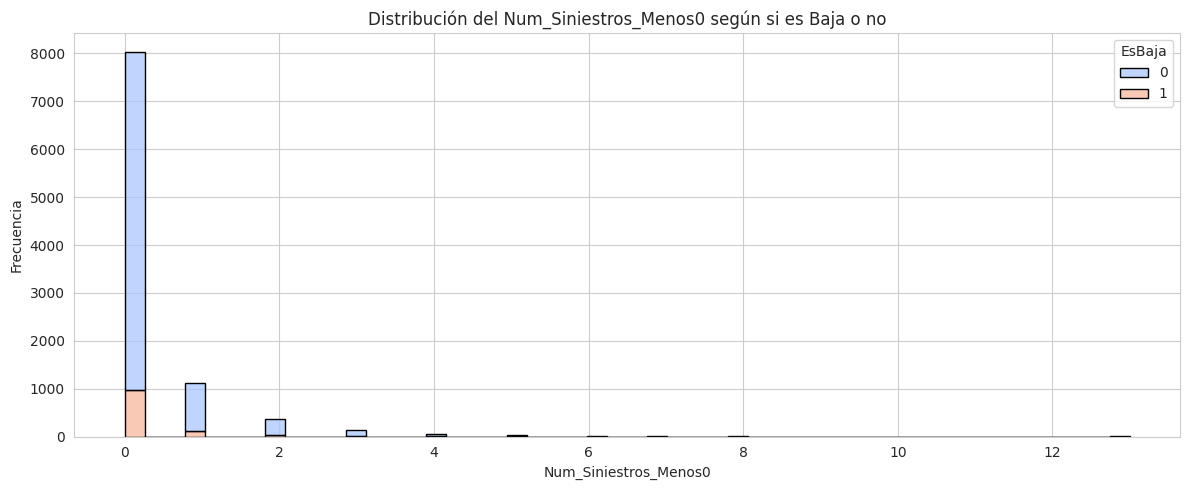

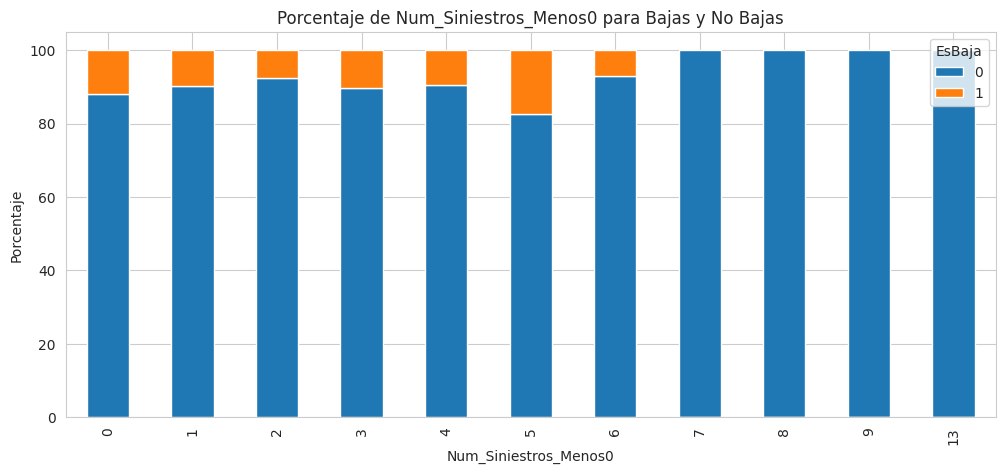

In [146]:
c = 'Num_Siniestros_Menos0'

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x=c, bins=50, hue='EsBaja', palette='coolwarm', multiple='stack', edgecolor='black')
plt.xlabel(c)
plt.ylabel('Frecuencia')
plt.title(f'Distribución del {c} según si es Baja o no')  # Corregido aquí
plt.tight_layout()
plt.show()

conteo = df.groupby([c, 'EsBaja']).size().unstack(fill_value=0)
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12, 5))  # Ajusté el tamaño de la figura
porcentaje.plot(kind='bar', stacked=True, ax=ax)
ax.set_title(f'Porcentaje de {c} para Bajas y No Bajas')  # Corregido aquí
ax.set_xlabel(c)
ax.set_ylabel('Porcentaje')
ax.legend(title='EsBaja')
plt.show()